In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [81]:
train = ImageDataGenerator(rescale = 1/255)
vali = ImageDataGenerator(rescale = 1/255)

In [92]:
train_dataset = train.flow_from_directory("my_dataset/train/",
                                         target_size = (100,100),
                                         batch_size = 15,
                                         shuffle = True,
                                         seed = 42,
                                         class_mode = "binary")
vali_dataset = vali.flow_from_directory("my_dataset/vali/",
                                         target_size = (100,100),
                                         batch_size = 15,
                                         shuffle = True,
                                         seed = 42,
                                         class_mode = "binary")

Found 1400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [93]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

Meines CNN Modell

In [94]:
model = tf.keras.models.Sequential([
                                ### Convolutional-Layer 1
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
                                    tf.keras.layers.Dropout(rate = 0.2),                               
                                    tf.keras.layers.MaxPool2D(2,2),
                                ### Convolutional-Layer 2
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.Dropout(rate = 0.2),
                                    tf.keras.layers.MaxPool2D(2,2),
                                ### Dense-Hidden-Layer 1                                    
                                    tf.keras.layers.Dense(500, activation = 'relu', 
                                                          kernel_initializer = "he_normal", 
                                                          kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01)),
                                ### Flatten-Layer 
                                    tf.keras.layers.Flatten(),
                                ### Output-Layer
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [95]:
# Alle Schichten des Modells
model.summary()
Model:"sequential"

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 dropout_16 (Dropout)        (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 dropout_17 (Dropout)        (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                 

In [96]:
opt = RMSprop(learning_rate = 0.001, rho = 0.9)
model.compile(loss = "binary_crossentropy",
             optimizer = opt,
             metrics = ["accuracy"])

In [97]:
#opt = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
#model.compile(loss = "binary_crossentropy",
#             optimizer = opt,
#             metrics = ["accuracy"])

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

In [99]:
history = model.fit(train_dataset,
                     steps_per_epoch = 15,
                     epochs = 50,
                     validation_data = vali_dataset,
                     callbacks = [early_stopping])

Epoch 1/50
15/15 [==============================] - 5s 269ms/step - loss: 14.0164 - accuracy: 0.4622 - val_loss: 9.4554 - val_accuracy: 0.5000
Epoch 2/50
15/15 [==============================] - 4s 239ms/step - loss: 8.7978 - accuracy: 0.5163 - val_loss: 8.2922 - val_accuracy: 0.5125
Epoch 3/50
15/15 [==============================] - 4s 268ms/step - loss: 7.8778 - accuracy: 0.5200 - val_loss: 7.4099 - val_accuracy: 0.5850
Epoch 4/50
15/15 [==============================] - 4s 265ms/step - loss: 7.0663 - accuracy: 0.5907 - val_loss: 6.5771 - val_accuracy: 0.5000
Epoch 5/50
15/15 [==============================] - 4s 260ms/step - loss: 6.2736 - accuracy: 0.5600 - val_loss: 5.7639 - val_accuracy: 0.5675
Epoch 6/50
15/15 [==============================] - 4s 256ms/step - loss: 5.3800 - accuracy: 0.5822 - val_loss: 5.0344 - val_accuracy: 0.5650
Epoch 7/50
15/15 [==============================] - 4s 259ms/step - loss: 4.7141 - accuracy: 0.5600 - val_loss: 4.3693 - val_accuracy: 0.5125
Epoch

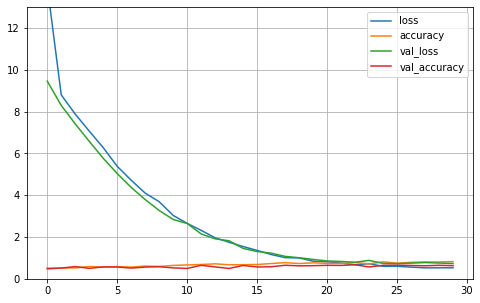

In [100]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 13)
plt.show()

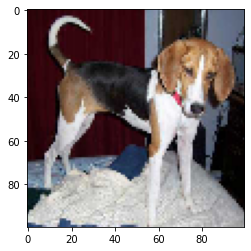

1/1 [==============================] - 0s 78ms/step
It is a cat


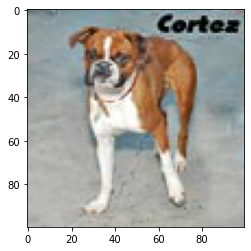

1/1 [==============================] - 0s 16ms/step
It is a dog


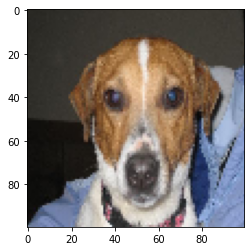

1/1 [==============================] - 0s 22ms/step
It is a dog


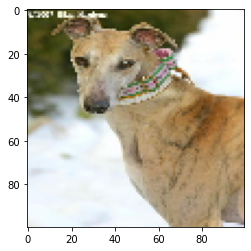

1/1 [==============================] - 0s 31ms/step
It is a dog


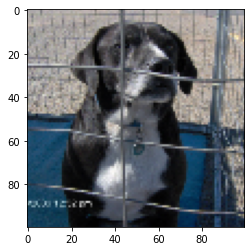

1/1 [==============================] - 0s 16ms/step
It is a dog


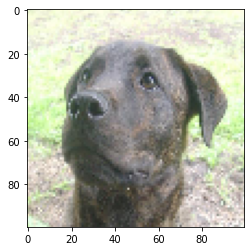

1/1 [==============================] - 0s 16ms/step
It is a dog


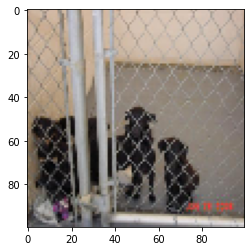

1/1 [==============================] - 0s 16ms/step
It is a dog


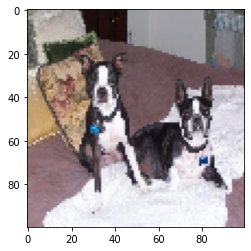

1/1 [==============================] - 0s 16ms/step
It is a dog


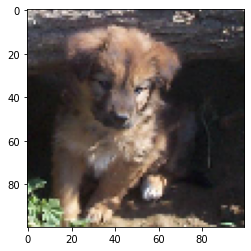

1/1 [==============================] - 0s 22ms/step
It is a dog


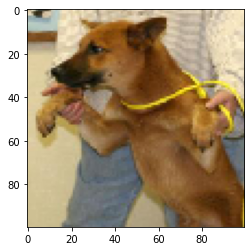

1/1 [==============================] - 0s 14ms/step
It is a dog


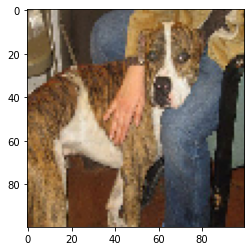

1/1 [==============================] - 0s 31ms/step
It is a dog


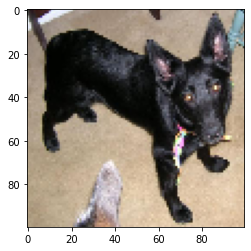

1/1 [==============================] - 0s 22ms/step
It is a dog


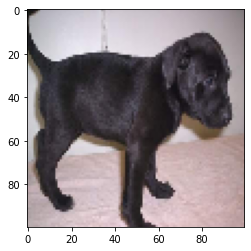

1/1 [==============================] - 0s 16ms/step
It is a dog


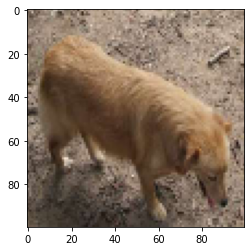

1/1 [==============================] - 0s 16ms/step
It is a dog


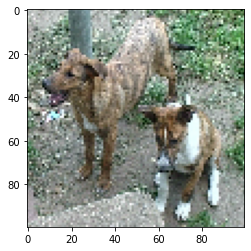

1/1 [==============================] - 0s 16ms/step
It is a dog


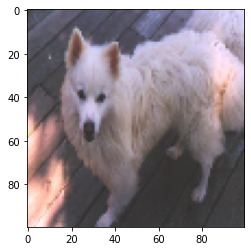

1/1 [==============================] - 0s 31ms/step
It is a dog


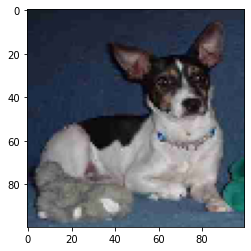

1/1 [==============================] - 0s 16ms/step
It is a cat


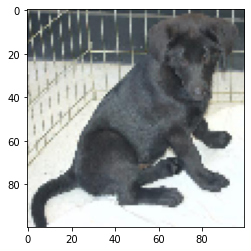

1/1 [==============================] - 0s 16ms/step
It is a cat


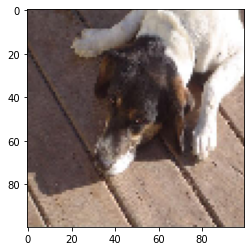

1/1 [==============================] - 0s 16ms/step
It is a dog


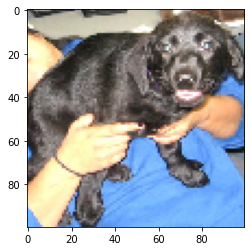

1/1 [==============================] - 0s 22ms/step
It is a dog


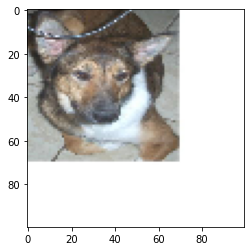

1/1 [==============================] - 0s 16ms/step
It is a dog


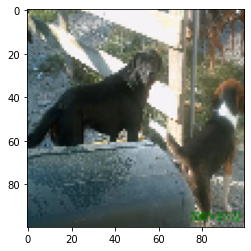

1/1 [==============================] - 0s 31ms/step
It is a dog


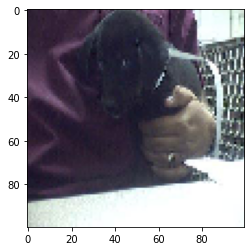

1/1 [==============================] - 0s 16ms/step
It is a dog


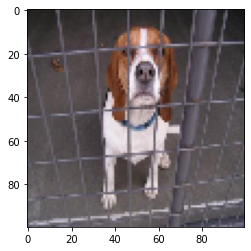

1/1 [==============================] - 0s 16ms/step
It is a dog


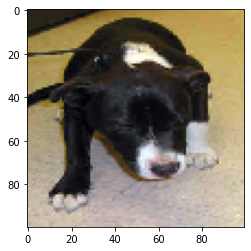

1/1 [==============================] - 0s 16ms/step
It is a dog


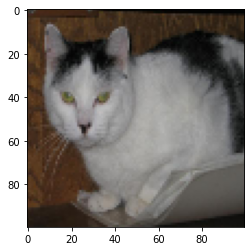

1/1 [==============================] - 0s 20ms/step
It is a dog


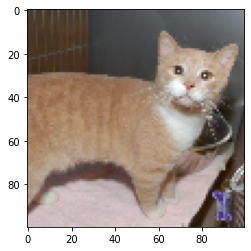

1/1 [==============================] - 0s 16ms/step
It is a dog


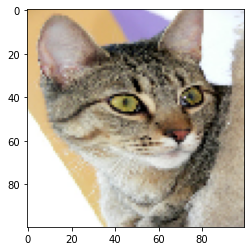

1/1 [==============================] - 0s 16ms/step
It is a cat


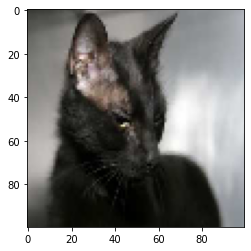

1/1 [==============================] - 0s 7ms/step
It is a dog


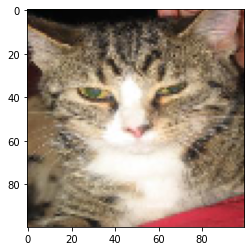

1/1 [==============================] - 0s 16ms/step
It is a dog


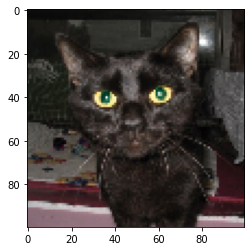

1/1 [==============================] - 0s 18ms/step
It is a cat


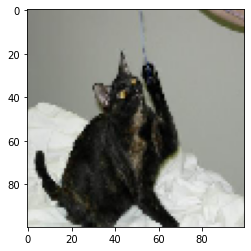

1/1 [==============================] - 0s 22ms/step
It is a dog


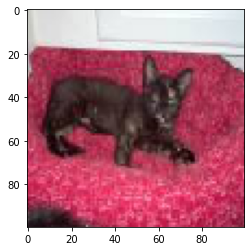

1/1 [==============================] - 0s 16ms/step
It is a cat


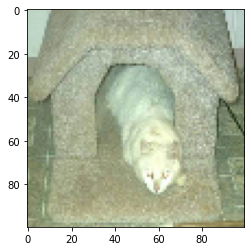

1/1 [==============================] - 0s 31ms/step
It is a dog


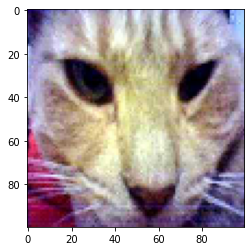

1/1 [==============================] - 0s 16ms/step
It is a dog


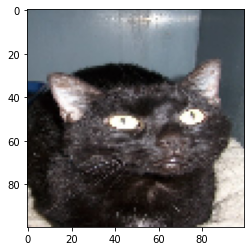

1/1 [==============================] - 0s 31ms/step
It is a dog


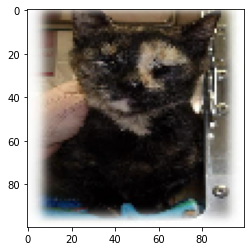

1/1 [==============================] - 0s 31ms/step
It is a cat


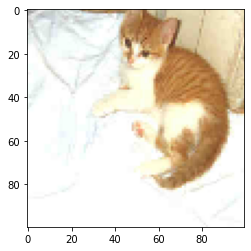

1/1 [==============================] - 0s 16ms/step
It is a dog


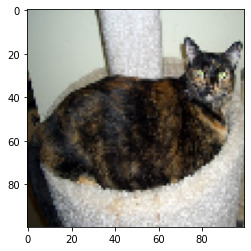

1/1 [==============================] - 0s 16ms/step
It is a cat


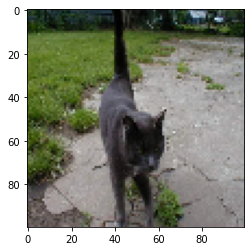

1/1 [==============================] - 0s 22ms/step
It is a dog


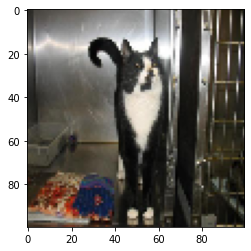

1/1 [==============================] - 0s 16ms/step
It is a dog


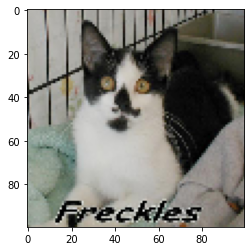

1/1 [==============================] - 0s 16ms/step
It is a dog


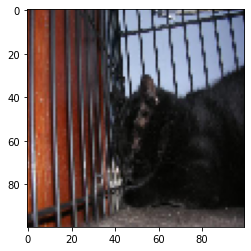

1/1 [==============================] - 0s 31ms/step
It is a dog


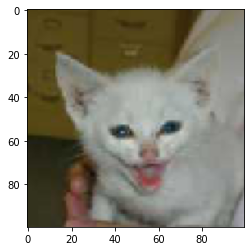

1/1 [==============================] - 0s 16ms/step
It is a dog


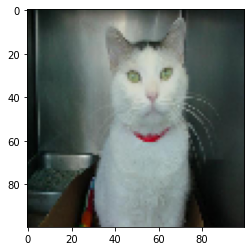

1/1 [==============================] - 0s 16ms/step
It is a dog


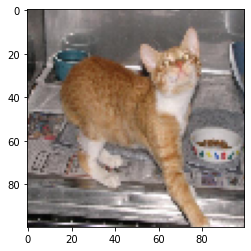

1/1 [==============================] - 0s 16ms/step
It is a dog


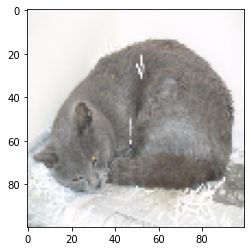

1/1 [==============================] - 0s 31ms/step
It is a cat


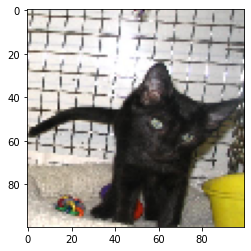

1/1 [==============================] - 0s 22ms/step
It is a dog


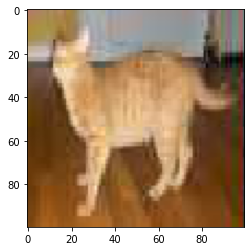

1/1 [==============================] - 0s 16ms/step
It is a cat


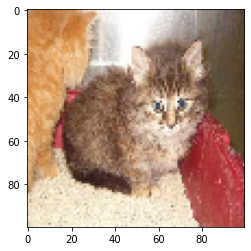

1/1 [==============================] - 0s 16ms/step
It is a cat


In [101]:
dir_path = "my_dataset/test"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size = (100, 100))
    plt.imshow(img)
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    images = np.vstack([img_array])
    predict = model.predict(images)
    if predict == 0:
        print("It is a cat")
    else:
        print("It is a dog")    